In [1]:
from IPython.display import display, Markdown, set_matplotlib_formats
import numpy as np
import matplotlib.pyplot as plt

set_matplotlib_formats('svg')

def result(symbol, x, units, digits=2, sci_exp=True, shift=0):
    exp = int(np.floor(np.log10(x))) - shift
    if abs(exp) > 3 and sci_exp:
        x /= 10**exp
        exp_str = f'\cdot 10^{{{exp}}}'
    else:
        exp_str = ''
    display(Markdown(
        f'${symbol} = {x:.{digits}f} {exp_str}\,\mathrm{{{units}}}$'))

 # Sila na vodnik v magnetnem polju


Na vodnik, ki leži v homogenem magetnem polju pravokotno na smer silnic, deluje sila, ki je sorazmerna s tokom $I$ skozi vodnik in z dolžino vodnika v polju $l$.

$$F = IlB.$$

Sorazmernostni koeficient $B$ je gostota magnetnega polja. Magnetni pretok $\Phi_m$ skozi okvir, ki je pravokoten na silnice, je v homogenem polju

$$\Phi_m = BS,$$

pri čemer je $S$ ploščina okvirja.

## Namen

S tehtanjem pokazati, da je sila na vodnik sorazmerna s tokom. Določiti gostoto magnetnega polja in pretoka med polom magneta.

## Pribor

Natančna tehtnica, podstavek z magnetom, stojalo z vodnikom, usmernik z ampermetrom.

## Meritve

Vključimo usmernik, in ko skozi žico ne teče tok, tehtnico umerimo na nič. Tok višamo po 250 mA in zapisujemo (negativno) maso, ki jo kaže tehtnica. Nato zamenjamo priključka na usmerniku, tako da tok teče v drugo smer in ponovimo meritve.

In [2]:
I = 1e-3 * np.array([
    0, 250, 500, 750, 1000, 1249, 1500, 1750, 2000, 2250, 2500, 2750, 2990,
    0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 2992
])
m = 1e-3 * np.array([
    0, 0.19, 0.40, 0.63, 0.87, 1.08, 1.30, 1.54, 1.74, 1.94, 2.20, 2.40, 2.64,
    0, 0.18, 0.39, 0.59, 0.79, 1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40
])

Izmerimo tudi dimenzijo magneta. Po dolžini vodnika meri 2 cm $\pm$ 0.5 mm, visok pa je 1 cm $\pm$ 0.5 mm.

In [3]:
l, Δl = 2e-2, 1e-3
h, Δh = 2e-2, 1e-3

## Račun

Skozi meritve mase po toku potegnemo premico, katere naklon je

$$\beta = \frac{lB}{g}.$$

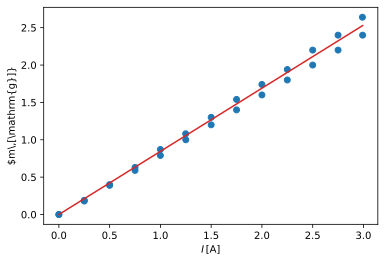

$\beta = 845.04 \,\mathrm{mg/A}$

$\sigma(\beta) = 14.40 \,\mathrm{mg/A}$

In [4]:
plt.xlabel(r'$I\,[\mathrm{A}]$')
plt.ylabel(r'$m\,[\mathrm{g}]}')

plt.scatter(I, 1e3 * m)
par, cov = np.polyfit(I, m, 1, cov=True)
β, σ_β = par[0], np.sqrt(cov[0,0])
plt.plot(I, 1e3 * β * I, color='tab:red')

plt.show()

result(r'\beta', 1e6 * β, 'mg/A')
result(r'\sigma(\beta)', 1e6 * σ_β, 'mg/A')

Iz naklona nato izračunamo gostoto magnetnega polja

$$B = \frac{\beta g}{l}.$$

In [5]:
g = 9.81
B = β*g / l
result('B', B, 'T')

$B = 0.41 \,\mathrm{T}$

Zapišemo odvode po spremenljivkah z napako.

$$\mathop{\partial_\beta} B = \frac{g}{l},$$
$$\mathop{\partial_l} B = -\frac{\beta g}{l^2}.$$

in poračunamo posamezne prispevke $\left(\partial_{x_i} B \cdot \sigma(x_i)\right)^2$.

In [6]:
from_β = (g/l * σ_β)**2
from_l = (β*g / l**2 * Δl)**2
from_l, from_β

(0.00042950827833158407, 4.987078781807489e-05)

In [7]:
σ_B = np.sqrt(from_β + from_l)
result(r'\sigma(B)', σ_B, 'T')

$\sigma(B) = 0.02 \,\mathrm{T}$

Izračunamo še magnetni pretok skozi okvir.

$$\Phi_m = Blh$$

In [8]:
Φ_m = B * l*h
result(r'\Phi_m', 1e6 * Φ_m, r'\mu Tm^2')

$\Phi_m = 165.80 \,\mathrm{\mu Tm^2}$

In še njegovo napako.

In [9]:
from_B = (l*h * σ_B)**2
from_l = (B*h * Δl)**2
from_h = (B*l * Δh)**2
from_B, from_l, from_h

(7.670065058394544e-11, 6.872132453305346e-11, 6.872132453305346e-11)

In [10]:
σ_Φ_m = np.sqrt(from_B + from_l + from_h)
result(r'\sigma(\Phi_m)', 1e6 * σ_Φ_m, r'\mu Tm^2')

$\sigma(\Phi_m) = 14.63 \,\mathrm{\mu Tm^2}$